In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar datos
train_data = pd.read_csv('emojis_train.csv')
test_data = pd.read_csv('emojis_test.csv')

# Función de limpieza de texto
def clean_text(text):
    text = re.sub(r'_EMO', '', text)
    text = re.sub(r'_URL', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar limpieza
train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

# Verificar nombres de columnas
print("Columnas de train_data:", train_data.columns)
print("Columnas de test_data:", test_data.columns)

# Separar características y etiquetas
X_train = train_data['text']
y_train = train_data['klass']# Ajustar según el nombre correcto
X_test = test_data['text']
y_test = test_data['klass'] # Ajustar según el nombre correcto

Columnas de train_data: Index(['text', 'klass'], dtype='object')
Columnas de test_data: Index(['text', 'klass'], dtype='object')


In [2]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_predict = nb_model.predict(X_test_vec)

# SVM
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
svm_predict = svm_model.predict(X_test_vec)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
rf_predict = rf_model.predict(X_test_vec)

Evaluación del modelo: Naive Bayes
Precisión (macro):  0.5731022476558191
Recall (macro):  0.3618371529491808
F1 Score (macro):  0.3146369955183555
Precisión (micro):  0.5129215943933421
Recall (micro):  0.5129215943933421
F1 Score (micro):  0.5129215943933421


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


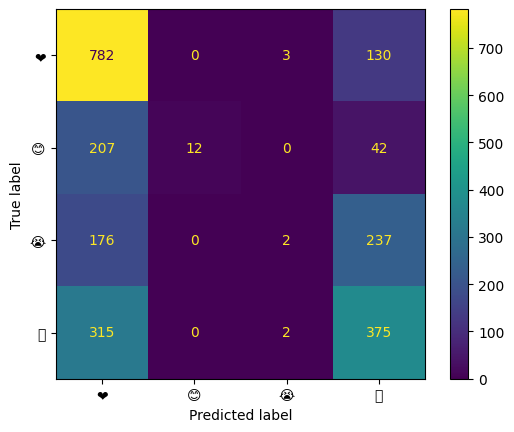

Evaluación del modelo: SVM
Precisión (macro):  0.6356659744958296
Recall (macro):  0.4036062983984678
F1 Score (macro):  0.37919226271620565
Precisión (micro):  0.5400788436268068
Recall (micro):  0.5400788436268068
F1 Score (micro):  0.5400788436268068


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


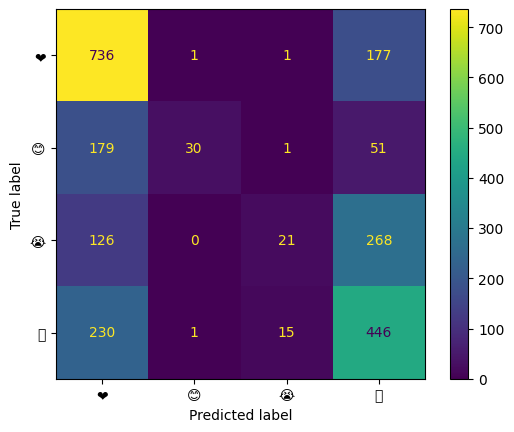

Evaluación del modelo: Random Forest
Precisión (macro):  0.5689576088434624
Recall (macro):  0.38941173987418787
F1 Score (macro):  0.3595578921105398
Precisión (micro):  0.5225580376697329
Recall (micro):  0.5225580376697329
F1 Score (micro):  0.5225580376697329


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


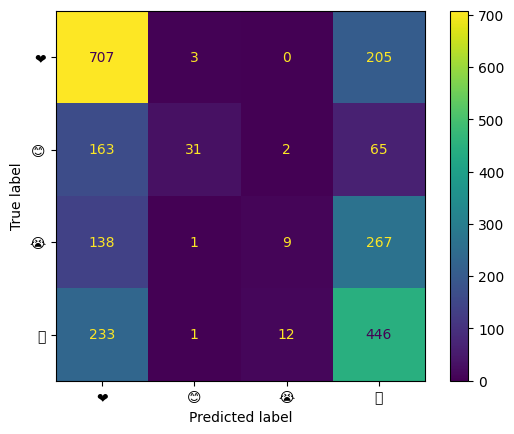

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Función para mostrar métricas
def evaluate_model(y_test, y_predict, model_name):
    print(f"Evaluación del modelo: {model_name}")
    print("Precisión (macro): ", precision_score(y_test, y_predict, average='macro'))
    print("Recall (macro): ", recall_score(y_test, y_predict, average='macro'))
    print("F1 Score (macro): ", f1_score(y_test, y_predict, average='macro'))
    print("Precisión (micro): ", precision_score(y_test, y_predict, average='micro'))
    print("Recall (micro): ", recall_score(y_test, y_predict, average='micro'))
    print("F1 Score (micro): ", f1_score(y_test, y_predict, average='micro'))
    ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
    plt.show()

# Evaluar Naive Bayes
evaluate_model(y_test, nb_predict, "Naive Bayes")

# Evaluar SVM
evaluate_model(y_test, svm_predict, "SVM")

# Evaluar Random Forest
evaluate_model(y_test, rf_predict, "Random Forest")